in questo non quadrano i CLimits SU MR del punto b)

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

# Import the dataset
data = pd.read_csv('2022-Jun-2.csv')

# Inspect the dataset
print(data.head())
print(data.info())

      x1     x2     x3
0  11.12  12.25  11.57
1  12.63  17.98  11.83
2   7.88  12.73  11.25
3  11.50  13.89  13.47
4  10.87  14.41  12.16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes
None


In [2]:
p = 3          # number of random variables

mu = pd.Series({'mu1': 11.3, 'mu2': 14.61, 'mu3': 12.12})
Sigma = pd.DataFrame([[4.4, 3.6,0.7],
                [3.6,4.6,1.5],
                [0.7,1.5,0.8]],
                columns=['sign1', 'sign2','sign3'],
                index=['sign1', 'sign2','sign3'])


In [3]:
mu[2]

12.12

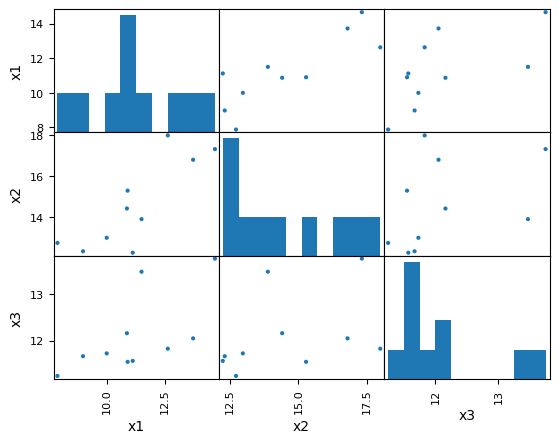

In [4]:
mf.scatter_b_vars(data)

In [5]:
#[pca,scores_df]=mf.p_pca(data, len(data), standardize='no') #NON va bene perchè STIMEREI i parametri!!!

In [6]:
X_centered = data.sub(mu.values)
print(X_centered)

     x1    x2    x3
0 -0.18 -2.36 -0.55
1  1.33  3.37 -0.29
2 -3.42 -1.88 -0.87
3  0.20 -0.72  1.35
4 -0.43 -0.20  0.04
5 -2.32 -2.29 -0.45
6 -1.30 -1.63 -0.39
7 -0.40  0.67 -0.57
8  3.36  2.70  1.63
9  2.42  2.18 -0.07


In [7]:
[eigenvalues, eigenvectors,cumulative_explained_variance_ratio]=mf.compute_eigens(Sigma)
#in questo caso i loadings sono sulle colonne a quanto pare, al contrario di quando uso pca.fit()


[8.423637   1.26052414 0.11583887]
[[-0.67232992 -0.67968211  0.29326559]
 [-0.71219663  0.48588869 -0.506644  ]
 [-0.20186243  0.54949468  0.81074481]]
[0.8595548  0.98817971 1.        ]


In [8]:
X_projected_df=mf.project_data_pca(data, mu, Sigma, eigenvectors,2,standardize='no')

       PC_1      PC_2
0  1.912828 -1.326577
1 -3.235761  0.574114
2  3.813918  0.932982
3  0.105801  0.256042
4  0.423467  0.217065


b)Design univariate control charts on the PCs retained at point a) with a familywise type I error 𝛼=
 0.01 and determine if data in Table 3 are in-control or not. 

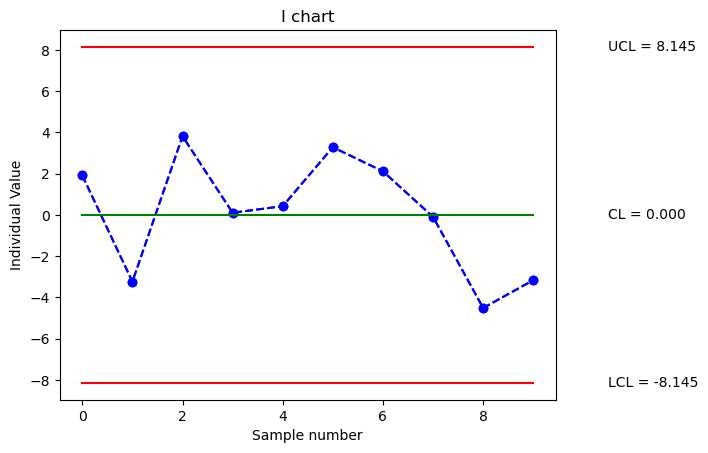

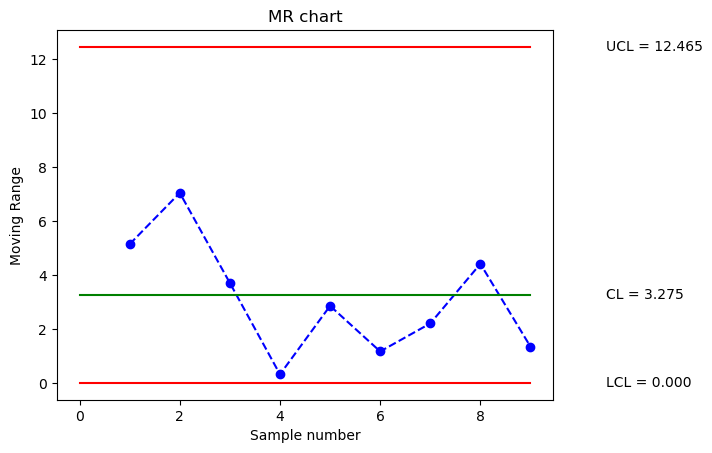

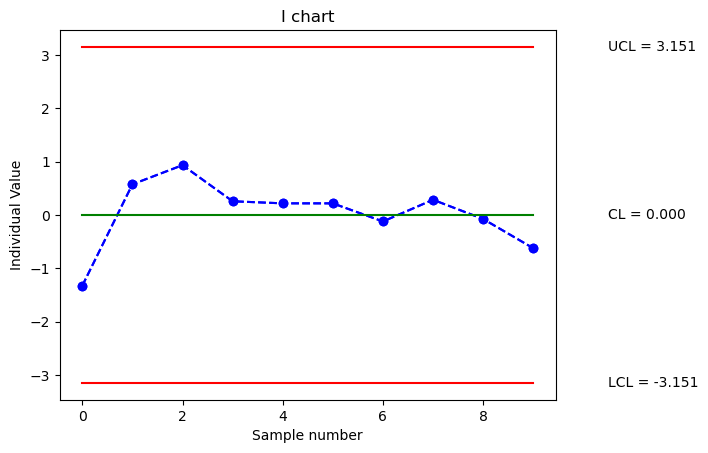

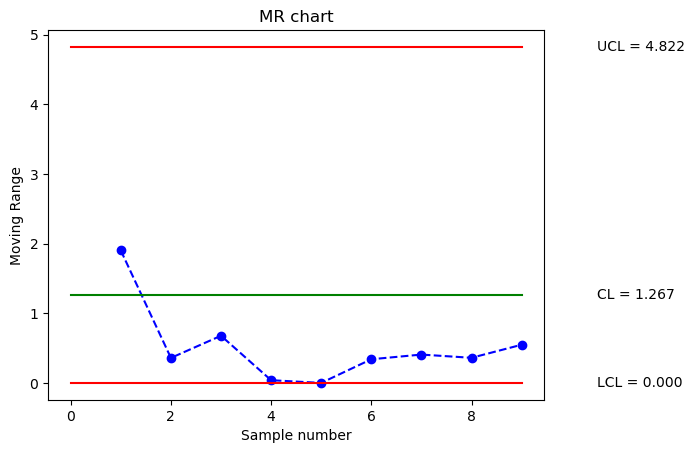

In [9]:
alpha_overall=0.01
alpha_single=1-(1-0.01)**(1/2)
k_alpha_single=stats.norm.ppf(1-alpha_single/2)

#sono a tutti gli effetti 2 (univariate) normalissimi IMR chart usando come individuals gli scores, le cui varianze sono
#rispettivamente lambda1=8.423637 e lambda2=1.26052414
#l'1 come secondo parametro è perchè n=1 
#lo 0 come quarto parametro indica la mu delle PC che è sempre 0 visto che il dataset prima della PCA viene centrato
df_CC_pc1=mf.IMR_my(X_projected_df['PC_1'],1,k_alpha_single,0,np.sqrt(8.423637),'no','no','yes')
df_CC_pc2=mf.IMR_my(X_projected_df['PC_2'],1,k_alpha_single,0,np.sqrt(1.26052414),'no','no','yes')


Design a 𝑇2 control chart on the PCs retained at point a) with a type I error 𝛼=0.01 and determine 
if data in Table 3 are in-control or not. 

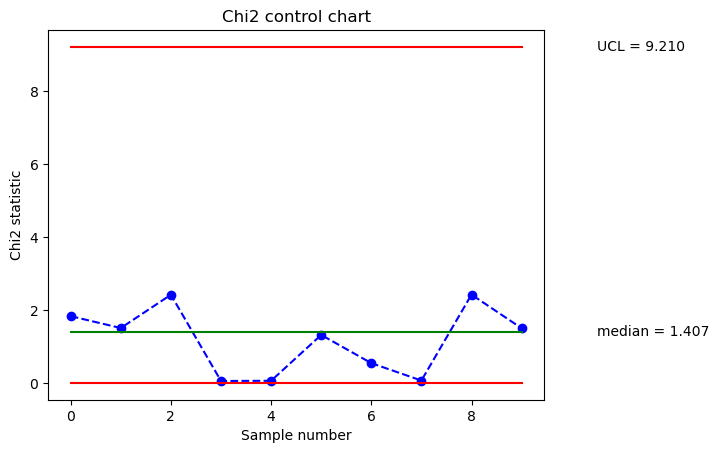

In [10]:
mu_ = pd.Series({'mu1': 0, 'mu2': 0})
Sigma_ = pd.DataFrame([[8.423637, 0],
                [0,1.26052414]],
                columns=['pc1', 'pc2'],
                index=['pc1', 'pc2'])

[UCL,data_CC]=mf.chi2cc(2,len(X_projected_df),1,alpha_overall,X_projected_df,mu_.values,Sigma_)

The head of the quality department is interested in analyzing the signal data reconstructed by 
applying the PCA and using the first k retained PCs (i.e., data obtained by back-transforming from 
the PC space to the original variable space). The aim is to evaluate to what extent the salient 
information enclosed in the signals is preserved. Determine the mean and variance of the 
reconstructed RMS of signal 1 using, respectively, 𝑘=1 and 𝑘=3 PCs. Discuss the result. 

In [18]:
scores_df=mf.project_data_pca(data, mu, Sigma, eigenvectors,3,standardize='no')
reconstructed_data=mf.reconstruct_from_pca_df(data,eigenvectors,scores_df,3,mu,Sigma,'no')

       PC_1      PC_2      PC_3
0  1.912828 -1.326577  0.696982
1 -3.235761  0.574114 -1.552463
2  3.813918  0.932982 -0.755826
3  0.105801  0.256042  1.517942
4  0.423467  0.217065  0.007654
Original data
       x1     x2     x3
0  11.12  12.25  11.57
1  12.63  17.98  11.83
2   7.88  12.73  11.25
3  11.50  13.89  13.47
4  10.87  14.41  12.16

Reconstructed (ORIGINAL) data
        0      1      2
0  11.12  12.25  11.57
1  12.63  17.98  11.83
2   7.88  12.73  11.25
3  11.50  13.89  13.47
4  10.87  14.41  12.16


In [19]:
reconstructed_data=mf.reconstruct_from_pca_df(data,eigenvectors,scores_df,1,mu,Sigma,'no')
#eigenvectors è quello resituito da [eigenvalues, eigenvectors,cumulative_explained_variance_ratio]=mf.compute_eigens(Sigma)
#mu e Sigma sono quelle costruite all'inizio (pandas series e pandas df rispettivamente)
#scores_df è restituito da mf.project_data_pca(data, mu, Sigma, eigenvectors,3,standardize='no')

Original data
       x1     x2     x3
0  11.12  12.25  11.57
1  12.63  17.98  11.83
2   7.88  12.73  11.25
3  11.50  13.89  13.47
4  10.87  14.41  12.16

Reconstructed (ORIGINAL) data
            0          1          2
0  10.013949  13.247691  11.733872
1  13.475499  16.914498  12.773179
2   8.735789  11.893740  11.350113
3  11.228867  14.534649  12.098643
4  11.015291  14.308408  12.034518


In [20]:
data.mean()

x1    11.226
x2    14.594
x3    12.103
dtype: float64

In [21]:
data.var()

x1    4.227360
x2    4.601004
x3    0.700668
dtype: float64

In [22]:
reconstructed_data.mean()

0    11.256581
1    14.564007
2    12.106964
dtype: float64

In [23]:
reconstructed_data.var()

0    3.738677
1    4.195203
2    0.337027
dtype: float64

The mean of the reconstructed data is equal to the mean of the original data regardless of the number k of 
retained PCs.  
The variance of the reconstructed data, instead, depends on the number k of retained PCs. When k=p (in this 
case, k=3), the reconstructed data coincide with the original data, as no dimensionality reduction is applied.